##Reading in the training data

In [2]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv('/content/diabetes.csv')
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# New Section

In [3]:
df.shape

(768, 9)

##Split up the dataset into inputs and targets
- Our input will be every column except ‘diabetes’ because ‘diabetes’ is what we will be attempting to predict. Therefore, ‘diabetes’ will be our target.


In [5]:
#create a dataframe with all training data except the target column
input_X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
input_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##Insert the ‘diabetes’ column of our dataset into our target variable (y)



In [6]:
#separate target values
target_y = df['Outcome'].values
#view target values
target_y[0:5]

array([1, 0, 1, 0, 1])

##Split the dataset into train and test data
-Scikit-learn has a function called ‘train_test_split’ that makes it easy for us to split our dataset into training and testing data.


In [7]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
#‘test_size’ to 0.2 = 20%  used for testing,  80% training data.
#‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
#stratify balances biased dataset
X_train, X_test, y_train, y_test = train_test_split(input_X, target_y, test_size=0.2, random_state=1, stratify=target_y)

##Building and training the model


In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##Testing the model


In [9]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1])

##Check model accuracy

In [12]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

##Plot confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[75, 25],
       [26, 28]])

Text(58.222222222222214, 0.5, 'Truth')

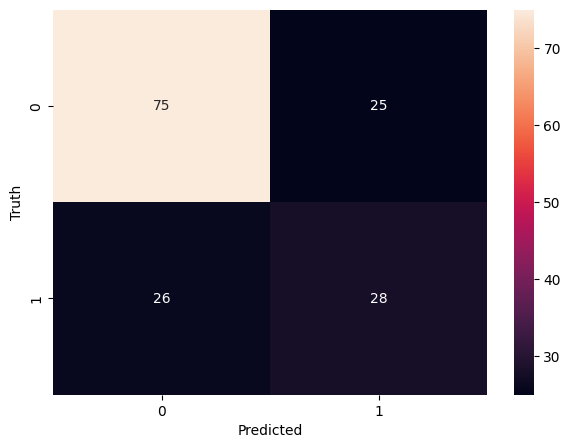

In [18]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


Print Classification report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       100
           1       0.53      0.52      0.52        54

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



Cross validation

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, input_X, target_y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


**Grid Search**

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755